In [1]:
print("Hello, World")

Hello, World


In [2]:
# https://www.kaggle.com/datasets/kundanbedmutha/customer-sentiment-dataset
import os
import pandas as pd

Dataset_path = os.path.join("datasets", "customer")

def load_dataset(dataset_path=Dataset_path):
    csv_path = os.path.join(dataset_path, "Customer_Sentiment.csv")
    return pd.read_csv(csv_path)

In [3]:
customers = load_dataset()

In [4]:
customers.head()

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


In [5]:
customers["gender"].value_counts()

gender
male      8385
female    8356
other     8259
Name: count, dtype: int64

In [6]:
customers["age_group"].value_counts()

age_group
46-60    5059
60+      5049
18-25    4990
26-35    4956
36-45    4946
Name: count, dtype: int64

In [7]:
customers["region"].value_counts()

region
west       5081
south      5022
east       5001
north      4963
central    4933
Name: count, dtype: int64

In [8]:
customers["product_category"].value_counts()

product_category
groceries         2858
automobile        2833
books             2812
travel            2811
fashion           2782
sports            2763
home & kitchen    2726
electronics       2725
beauty            2690
Name: count, dtype: int64

In [9]:
customers["purchase_channel"].value_counts()

purchase_channel
online    25000
Name: count, dtype: int64

In [10]:
customers["platform"].value_counts()

platform
nykaa                   1301
snapdeal                1289
others                  1286
reliance digital        1279
zepto                   1278
facebook marketplace    1272
paytm mall              1271
myntra                  1267
croma                   1266
flipkart                1264
boat                    1257
lenskart                1241
jiomart                 1240
meesho                  1240
ajio                    1234
bigbasket               1230
shopclues               1220
tata cliq               1201
swiggy instamart        1192
amazon                  1172
Name: count, dtype: int64

In [11]:
customers["customer_rating"].value_counts()

customer_rating
3    5085
4    5066
2    5046
5    4912
1    4891
Name: count, dtype: int64

In [12]:
customers["sentiment"].value_counts()

sentiment
positive    9978
negative    9937
neutral     5085
Name: count, dtype: int64

<Axes: >

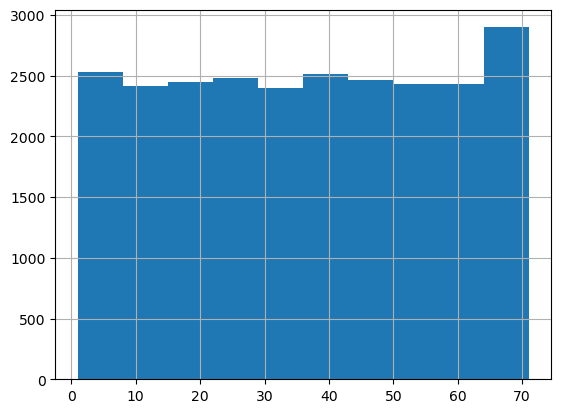

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

customers["response_time_hours"].hist()

In [14]:
customers["issue_resolved"].value_counts()

issue_resolved
yes    16593
no      8407
Name: count, dtype: int64

In [15]:
customers["complaint_registered"].value_counts()

complaint_registered
no     15063
yes     9937
Name: count, dtype: int64

In [16]:
customers = customers.drop("review_text", axis = 1)

In [17]:
customers = customers.drop("purchase_channel", axis=1)

In [18]:
customers = customers.drop("customer_id", axis=1)
customers = customers.drop("sentiment", axis=1)

In [19]:
customers.head()

,gender,age_group,region,product_category,platform,customer_rating,response_time_hours,issue_resolved,complaint_registered
0,male,60+,north,automobile,flipkart,1,46,yes,yes
1,other,46-60,central,books,swiggy instamart,5,5,yes,no
2,female,36-45,east,sports,facebook marketplace,1,38,yes,yes
3,female,18-25,central,groceries,zepto,2,16,yes,yes
4,female,18-25,east,electronics,croma,3,15,yes,no


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

customers["complaint_registered"] = customers["complaint_registered"] == 'yes'
customers["issue_resolved"] = customers["issue_resolved"] == 'yes'

def group_to_num(age_group):
    match age_group:
        case '46-60':
            return 53
        case '60+':
            return 70
        case '18-25':
            return 21
        case '26-35':
            return 30
        case '36-45':
            return 40
         
customers["age"] = list(map(group_to_num, customers["age_group"]))

for train_index, test_index in split.split(customers, customers["customer_rating"]):
    strat_train_set = customers.loc[train_index]
    strat_test_set = customers.loc[test_index]

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_group", axis=1, inplace=True)

In [22]:
customers_data = strat_train_set.drop("customer_rating", axis=1)
customers_labels = strat_train_set["customer_rating"].copy()

In [23]:
test_data = strat_test_set.drop("customer_rating", axis=1)
test_labels = strat_test_set["customer_rating"].copy()

In [24]:
customers_num = customers_data.drop("gender", axis=1)
customers_num = customers_num.drop("region", axis=1)
customers_num = customers_num.drop("product_category", axis=1)
customers_num = customers_num.drop("platform", axis=1)
customers_num = customers_num.drop("complaint_registered", axis=1)
customers_num = customers_num.drop("issue_resolved", axis=1)

In [25]:
customers_num.head()

,response_time_hours,age
21490,30,53
11478,58,70
1563,1,21
20462,54,30
19205,43,70


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attr = ["age", "response_time_hours"]
cat_attr = ["gender", "region", "product_category", "platform"]

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("onehot", OneHotEncoder(), cat_attr),
])

customers_prepared = full_pipeline.fit_transform(customers_data)

In [27]:
customers_prepared.toarray()[0]

array([ 0.58516359, -0.29293647,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [28]:
customers_labels

21490    1
11478    4
1563     5
20462    5
19205    1
        ..
22039    1
20299    4
3682     4
2637     4
21693    4
Name: customer_rating, Length: 20000, dtype: int64

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(customers_prepared, customers_labels)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, customers_prepared, customers_labels, cv=3, scoring="accuracy")

array([0.2060897 , 0.19559022, 0.19831983])

In [31]:
test_set_predictions = forest_clf.predict(full_pipeline.fit_transform(test_data))

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(test_set_predictions, test_labels)

0.2012

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {'n_neighbors': [4], 'weights' : ['distance']},
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(customers_prepared, customers_labels)

,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [4], 'weights': ['distance']}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,4


In [36]:
testing_model = grid_search.best_estimator_
train_set_predictions = testing_model.predict(customers_prepared)
accuracy_score(train_set_predictions, customers_labels)

0.9911

In [37]:
test_set_predictions = testing_model.predict(full_pipeline.fit_transform(test_data))
accuracy_score(test_set_predictions, test_labels)

0.2056